<a href="https://colab.research.google.com/github/spatank/CIS-522/blob/main/HW_2_SPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS-522 Week 2 Homework


**Instructor:** Konrad Kording

**Content Creators:** Ameet Rahane, Spiros Chavlis

---
## Preface
Since this week's homework requires coding, we recommend saving this notebook in your google Drive (`File -> Save a copy in Drive`), and share the link to the final version in the subscription airtable form. You can also attach the code to the form if you prefer off-colab coding.

In [1]:
#@markdown What is your Pennkey and pod? (text, not numbers, e.g. bfranklin)
my_pennkey = 'spatank' #@param {type:"string"}
my_pod = 'sublime-newt' #@param ['Select', 'euclidean-wombat', 'sublime-newt', 'buoyant-unicorn', 'lackadaisical-manatee','indelible-stingray','superfluous-lyrebird','discreet-reindeer','quizzical-goldfish','ubiquitous-cheetah','nonchalant-crocodile','fashionable-lemur','spiffy-eagle','electric-emu','quotidian-lion','astute-jellyfish', 'quantum-herring']

# start timing
import time
try:t0;
except NameError: t0 = time.time()



## Part 1. Recap
This week, we looked at how to create deep fully connected networks in pytorch, covering everything from an introduction to Pytorch tensor operations to deep linear networks. Meet with your pod for 10 minutes to discuss what you learned, what was clear, and what you hope to learn more about.

In this homework, we will be exploring that a little more. First, we will read a paper by Andrew M. Saxe, James L. McClelland, and Surya Ganguli on _A mathematical theory of semantic development in deep neural networks_. Then, you will design your own linear network to solve a given problem on a dataset.

**Note:** Before or after doing the Homework, we highly encourage you to finish the optional material of [W2_Tutorial2](https://colab.research.google.com/github/CIS-522/course-content/blob/main/tutorials/W2_PyTorchDLN/student/W2_Tutorial2.ipynb) notebook, and especially Section 7. Although the concepts covered in the optional part are not a requirement to finish the Homework, finishing these materials will help you improve your current intuition on Deep Learning.



## Part 2: Read a paper

Read the paper [A mathematical theory of semantic development in deep neural networks](https://www.pnas.org/content/116/23/11537.short). Take some time and try to contextualize this with respect to the content we covered this week. For more context, watch the talk by Surya Ganguli below. After reading the paper, discuss the main figures with your pod.

In [ ]:
#@markdown ### Dr. Ganguli's talk
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="SJAvFqHw-hA", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

In [ ]:
#@markdown **Student response**: What do you think is the most important aspect of the paper?
thoughts_on_paper = '' #@param {type:"string"}


## Part 3: Design your deep network!

In this section, you'll design a deep linear network to perform linear regression in a real dataset. We will provide the data for you.

We will use the **QSAR fish toxicity dataset** taken from the UCI Machine Learning Repository for this homework. For more information you can see [here](https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity) and also read the relevant [publication](http://www.doi.org/10.1080/1062936X.2015.1018938). This study focuses on the development of a new QSAR (Quantitative structure-activity relationship, for more info see [here](https://en.wikipedia.org/wiki/Quantitative_structure%E2%80%93activity_relationship)) model to predict the acute toxicity of various chemicals, defined as $LC_{50}$ 96 hours, towards the fathead minnow (Pimephales promelas).

The dataset consists of $908$ number of examples, $6$ features, and $1$ target variable.

Namely, the features are six molecular descriptors:

1. CIC0: Complementary Information Content index, neighborhood symmetry of 0-order (encode information regarding heteroatoms)
2. SM1_Dz(Z): the spectral moment of order one from Barysz matrix weighted by atomic number (account for heteroatoms, large values more heterogeneity)
3. GATS1i: Geary autocorrelation of lag 1 weighted by ionization potential (shows the number of carbon-carbon bonds)
4. NdsCH: Number of atoms of type dsCH (encode information
about the electrophilic characteristics of chemicals)
5. NdssC: Number of atoms of type dssC (encode information
about the electrophilic characteristics of chemicals)
6. MLogP: Moriguchi octanol-water partition coefficient (a widely accepted estimate of the lipophilicity of organic compounds, which is considered the driving force of narcosis) 

and the target variable is a quantitative response (toxicity), $LC_{50} [-log_{10}(mol/L)]$.

This small project aims to find the linear relationship between these molecular markers and the toxicity. So, you will implement a deep linear network to perform linear regression.

Towards this goal, you have to perform the following steps:

1. Download and visualize the dataset. As our samples contain six features, we can perform PCA or any other dimensionality reduction method to visualize our dataset, e.g., [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

  ```python
    # Code example for PCA
    X = np.array([[-1, -1],
                  [-2, -1],
                  [-3, -2],
                  [1, 1],
                  [2, 1],
                  [3, 2]])

    pca = decomposition.PCA(n_components=2)  # project in 2D space
    pca.fit(X)
    Xprojected = pca.transform(X)
  ```

2. Split the dataset into training and testing subsets (you can split in 80-20 scheme) using [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
3. Write your deep linear network with any approach that is more comfortable for you. Here, we provide an example using the `nn.Module` class of PyTorch.

  ```python
    # Example
    class Network(nn.Module):

      def __init__(self, input_dim, hidden_1, hidden_2, output_dim):
        super(Network, self).__init__()

        self.input_dim = input_dim
        self.hidden_1 = hidden_1
        self.output_dim = output_dim

        # A fully-connected network (FCN) with 2 hidden layers
        self.fc1 = nn.Linear(self.input_dim, self.hidden_1)
        self.fc2 = nn.Linear(self.hidden_1, self.output_dim)

      def forward(self, x):
        h1 = self.fc1(x)
        out = self.fc3(h1)

        return out

  ```

4. Choose the hyperparameters (i.e., number of epochs, learning rate, number of layers and nodes per layer)

  ```python
    # Here, you have to write your training loop

    def training(inputs, targets, num_epochs, learning_rate):

      # Set up the network
      mynetwork = Network(...)

      # optimizer and loss function
      criterion = ...
      optimizer = ...

      for epoch in range(num_epochs):
        # Your CODE goes here

      return (loss_training, loss_test, ...)
    
  ```

5. Train the model and give the graph with
  - training and test loss vs. number of epochs
  ```python
    plt.figure()
    plt.plot(..., label='training', 'b')
    plt.plot(..., label='test', 'r')
    plt.legend()
    plt.show()
  ```
6. Give a plot with the model's performance (actual vs. predicted targets)
  ```python
    plt.figure()
    plt.plot(..., alpha=0.5)
    plt.plot(..., label='regression', 'r')  # plot the y=y_hat line
    plt.legend()
    plt.show()  

  ```
7. Train the model again by removing each time one feature. Report what do you observe in terms of performance. You can use NumPy's function [`np.delete()`](https://numpy.org/doc/stable/reference/generated/numpy.delete.html) to remove specific rows/columns from a `ndarray` object.
  ```python
    # Here, we have to remove one by one the features from the X dataset
    # Hint: The network input layer has to be changed ...
    # retrain and keep the predictions.
    # Then, plot all regressions in one plot using subplots
    plt.figure()
    for i, preds in enumerate(predictions):
      plt.subplot(2, 3, i + 1)
      plt.plot(...)  # plot original y vs. y_hat
      plt.plot(...)  # y=y_hat
      plt.legend()
  ```


*Hints:*
- Be sure to use the correct dimensions
- Put legends and title in all plots

**Note:** Typically, to make unbiased and more accurate predictions, we perform multiple training pieces with different initializations (recall that we initialize parameters sampling from distribution) and different train-test splits. Here we want to run one time for the sake of timing, but feel free to run more times the training loops and plot the average losses!

In [2]:
#@markdown #Run this cell to download the dataset
#@markdown ##Inputs are stored in `X`, and targets in `y`.

import pandas as pd
import numpy as np

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv'

headers = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLogP', 'LC50']

df1 = pd.read_csv(url, names = headers, header=None, delimiter=";")

X = np.array(df1)[:,:-1]
y = np.array(df1)[:,-1].reshape(-1,1)

print(f'Data: \n{df1}')

print(f'\ninput shape of X: {X.shape}, ' 
      f'targets shape of y: {y.shape}')

Data: 
      CIC0  SM1_Dz(Z)  GATS1i  NdsCH  NdssC  MLogP   LC50
0    3.260      0.829   1.676      0      1  1.453  3.770
1    2.189      0.580   0.863      0      0  1.348  3.115
2    2.125      0.638   0.831      0      0  1.348  3.531
3    3.027      0.331   1.472      1      0  1.807  3.510
4    2.094      0.827   0.860      0      0  1.886  5.390
..     ...        ...     ...    ...    ...    ...    ...
903  2.801      0.728   2.226      0      2  0.736  3.109
904  3.652      0.872   0.867      2      3  3.983  4.040
905  3.763      0.916   0.878      0      6  2.918  4.818
906  2.831      1.393   1.077      0      1  0.906  5.317
907  4.057      1.032   1.183      1      3  4.754  8.201

[908 rows x 7 columns]

input shape of X: (908, 6), targets shape of y: (908, 1)


Insert your code in the cell below or use any IDE (e.g, [PyCharm](https://www.jetbrains.com/pycharm/), [VS-Code](https://code.visualstudio.com/), [Spyder](https://www.spyder-ide.org/), etc.) or editor you prefer.

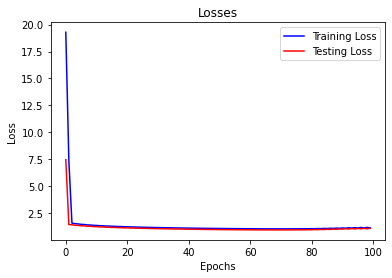

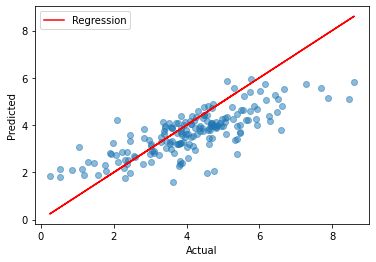

In [75]:
import numpy as np
import random, time
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
from tqdm.notebook import tqdm, trange

from sklearn import model_selection

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# VISUALIZE

# CONSTRUCT NETWORK

class linear_network(nn.Module):

  def __init__(self, input_dim, hidden_1, hidden_2, output_dim):
    super().__init__()

    self.input_dim = input_dim
    self.hidden_1 = hidden_1
    self.hidden_2 = hidden_2
    self.output_dim = output_dim

    # Fully-connected network with 2 hidden layers
    self.fc1 = nn.Linear(self.input_dim, self.hidden_1)
    self.fc2 = nn.Linear(hidden_1, hidden_2)
    self.fc3 = nn.Linear(hidden_2, output_dim)

  def forward(self, x):
    h1 = self.fc1(x)
    h2 = self.fc2(h1)
    out = self.fc3(h2)

    return out

# CHOOSE HYPERPARAMETERS AND WRITE TRAINING LOOP

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def train(inputs, targets, num_epochs = 100, learning_rate = 0.02):

  # SPLIT INTO TRAIN AND TEST
  X_train, X_test, y_train, y_test = \
  model_selection.train_test_split(inputs, targets, test_size = 0.2)

  # converting inputs and labels to Variable
  if torch.cuda.is_available():
    X_train = Variable(torch.from_numpy(X_train).float().cuda())
    y_train = Variable(torch.from_numpy(y_train).float().cuda())
    X_test = Variable(torch.from_numpy(X_test).float().cuda())
    y_test = Variable(torch.from_numpy(y_test).float().cuda())
  else:
    X_train = Variable(torch.from_numpy(X_train).float())
    y_train = Variable(torch.from_numpy(y_train).float())
    X_test = Variable(torch.from_numpy(X_test).float())
    y_test = Variable(torch.from_numpy(y_test).float())

  input_dim = X_train.shape[1]
  hidden_1 = 10
  hidden_2 = 10
  output_dim = y_train.shape[1]

  model = linear_network(input_dim, hidden_1, hidden_2, output_dim)

  # run on GPU
  model.train(True)
  model.to(device)

  criterion = nn.MSELoss() # loss function
  optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) # optimizer

  loss_train = []
  loss_test = []

  epoch_range = trange(num_epochs, desc = 'loss: ', leave = True)
  for epoch in epoch_range:
    if loss_train:
      epoch_range.set_description("loss: {:.6f}".format(loss_train[-1]))
      epoch_range.refresh() # to show immediately the update
    time.sleep(0.01)

    optimizer.zero_grad() # reset gradients to zero for each epoch

    train_prediction = model(X_train) # compute predictions
    loss = criterion(train_prediction, y_train) # compute loss
    loss.backward() # get gradients w.r.t to parameters

    optimizer.step() # update parameters  
    
    loss_train.append(loss.item())

    test_prediction = model(X_test)
    loss_test.append(criterion(test_prediction, y_test))

  return (test_prediction, y_test, loss_train, loss_test, num_epochs)

# TRAIN THE MODEL
outputs = train(X, y) # loss_train, loss_test

test_prediction = outputs[0].detach().cpu().numpy()
y_test = outputs[1].detach().cpu().numpy()
loss_train = outputs[2]
loss_test = outputs[3]
num_epochs = outputs[4]


plt.figure()               
plt.plot(range(num_epochs), loss_train, 'b', label = 'Training Loss')
plt.plot(range(num_epochs), loss_test, 'r', label = 'Testing Loss')
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.scatter(y_test, test_prediction, alpha = 0.5)
plt.plot(y_test, y_test, 'r', label = 'Regression') 
plt.xlabel('Actual')
plt.ylabel('Predicted') 
plt.legend()
plt.show()  

In [ ]:
#@markdown **Student response**: Which is the most/less important feature of this dataset?
dataset_features = '' #@param {type:"string"}


# Submission
Double check that the answers have been correctly formatted in the Airtable below, and edit them as desired. **In addition to submitting the form, contribute and reflect on these readings in the student Slack space.**

Feel free to use the embeded form below or use this link:
<a target="_blank" rel="noopener noreferrer" href="https://airtable.com/shrV231jtyUrwkvuZ">https://airtable.com/shrV231jtyUrwkvuZ</a>

In [ ]:
#@markdown #Run Cell to Show Airtable Form
#@markdown ##**Confirm your answers and then click "Submit"**
import numpy as np
import time
from IPython.display import IFrame
def prefill_form(src, fields: dict):
  '''
  src: the original src url to embed the form
  fields: a dictionary of field:value pairs,
  e.g. {"pennkey": my_pennkey, "location": my_location}
  '''
  prefills = "&".join(["prefill_%s=%s"%(key, fields[key]) for key in fields])
  src = src + prefills
  src = "+".join(src.split(" "))
  return src

#autofill fields if they are not present
#a missing pennkey and pod will result in an Airtable warning
#which is easily fixed user-side.
try: my_pennkey;
except NameError: my_pennkey = ""
try: my_pod;
except NameError: my_pod = "Select"
try: general_thoughts;
except NameError: general_thoughts = ""
try: dataset_features;
except NameError: dataset_features = ""

times = 0

fields = {"pennkey": my_pennkey,
          "pod": my_pod,
          "thoughts_on_paper":general_thoughts,
          "reflection_1":dataset_features,
          "cumulative_times": times}

src = "https://airtable.com/embed/shrV231jtyUrwkvuZ?"

#now instead of the original source url, we do: src = prefill_form(src, fields)
display(IFrame(src = prefill_form(src, fields), width = 800, height = 400))